In [1]:
# HW4 sample script

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
### load dataset

In [4]:
files=['atlanta_temperature.tsv','bos_temp.tsv','anchorage_temp.tsv','pasadena_temp.tsv']
### set up data matrix, after 1960-
year=np.arange(1960,2020,1)
N=np.size(year)
JAN=np.zeros((4,N))
JUL=np.zeros((4,N))
index=0
for fn in files:
    data=np.genfromtxt('DATA/'+fn,delimiter='\t')
    yr=data[:,0]
    jan=data[:,1] # extract jan temp
    jul=data[:,7] # extract jul temp
    ind=np.where(yr>=1960)
    JAN[index,:]=jan[ind]
    JUL[index,:]=jul[ind]
    index=index+1

In [5]:
### apply mask to missing data
JAN[JAN==-999]=np.nan
JUL[JUL==-999]=np.nan
### apply mask to the missing data
JUL=np.ma.array(JUL,mask=np.isnan(JUL)) # then mask the missing value with Nans
JAN=np.ma.array(JAN,mask=np.isnan(JAN))

In [6]:
### calculate regression coefficient and R2, to do so, I need to calculate the covariance between temperature and time

In [7]:
JUL1=np.append(JUL,[year],axis=0) # first append the time axis
C_JUL=np.ma.cov(JUL1,allow_masked=True) 
JAN1=np.append(JAN,[year],axis=0) # first append the time axis
C_JAN=np.ma.cov(JAN1,allow_masked=True) # 

In [8]:
### calculate the regression coefficient for July
var_JUL=np.diag(C_JUL)
a_JUL=C_JUL[0:4,4]/var_JUL[4] # regr coeff
R2_JUL=C_JUL[0:4,4]**2/var_JUL[0:4]/var_JUL[4] # R2

In [9]:
### calculate the regression coefficient for Jan
var_JAN=np.diag(C_JAN)
a_JAN=C_JAN[0:4,4]/var_JAN[4] # regr coeff
R2_JAN=C_JAN[0:4,4]**2/var_JAN[0:4]/var_JAN[4] # R2

Regression coeff in Jan is similar to or greater than July values. 


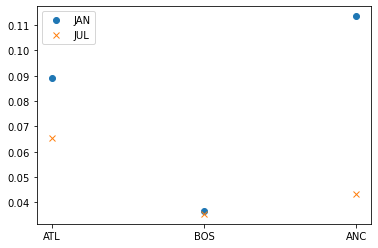

In [10]:
### display regression coeff
stn=['ATL','BOS','ANC','PAS']
plt.plot(stn,a_JAN,'o')
plt.plot(stn,a_JUL,'x')
plt.legend(['JAN','JUL'])
print('Regression coeff in Jan is similar to or greater than July values. ')

R2 value in July is always greater than that of January. 


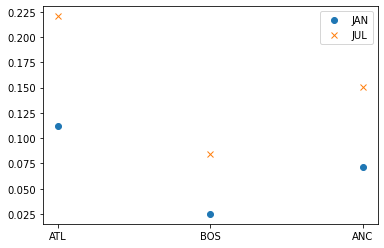

In [11]:
### display R2
stn=['ATL','BOS','ANC','PAS']
plt.plot(stn,R2_JAN,'o')
plt.plot(stn,R2_JUL,'x')
plt.legend(['JAN','JUL'])
print('R2 value in July is always greater than that of January. ')

In [12]:
### calculate covariance matrices, July
C_JUL=np.ma.cov(JUL,allow_masked=True) 
df=pd.DataFrame(C_JUL,index=stn,columns=stn);
df.style

,ATL,BOS,ANC,PAS
ATL,5.910000,1.258559,0.215339,0.409620
BOS,1.258559,4.575082,0.811042,0.600275
ANC,0.215339,0.811042,3.810788,0.918755
PAS,0.409620,0.600275,0.918755,4.544915


In [13]:
### calculate covariance matrices, July
C_JAN=np.ma.cov(JAN,allow_masked=True)
df=pd.DataFrame(C_JAN,index=stn,columns=stn);
df.style

,ATL,BOS,ANC,PAS
ATL,21.624438,11.530045,-12.829791,-1.022978
BOS,11.530045,16.432362,-6.343548,-3.645906
ANC,-12.829791,-6.343548,54.669819,5.133317
PAS,-1.022978,-3.645906,5.133317,7.779579


In [14]:
print('Covariance matrix is a positive symmetric matrix. Its amplitude is larger in winter months. ')

Covariance matrix is a positive symmetric matrix. Its amplitude is larger in winter months. 


In [15]:
### calculate correlation matrix in July
R_JUL=np.ma.corrcoef(JUL,allow_masked=True) 
df=pd.DataFrame(R_JUL,index=stn,columns=stn);
df.style

,ATL,BOS,ANC,PAS
ATL,1.000000,0.242036,0.045376,0.078490
BOS,0.242036,1.000000,0.194239,0.134573
ANC,0.045376,0.194239,1.000000,0.219708
PAS,0.078490,0.134573,0.219708,1.000000


In [16]:
### calculate correlation matrix in January
R_JAN=np.ma.corrcoef(JAN,allow_masked=True) 
df=pd.DataFrame(R_JAN,index=stn,columns=stn);
df.style

,ATL,BOS,ANC,PAS
ATL,1.000000,0.611658,-0.373141,-0.078273
BOS,0.611658,1.000000,-0.211645,-0.320119
ANC,-0.373141,-0.211645,1.000000,0.246826
PAS,-0.078273,-0.320119,0.246826,1.000000


In [17]:
print('Atlanta and Boston appears to be positively correlated (r=0.61) during winter months. ')

Atlanta and Boston appears to be positively correlated (r=0.61) during winter months. 


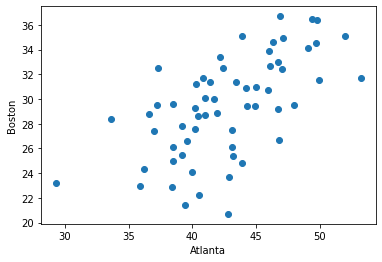

In [18]:
plt.plot(JAN[0,:],JAN[1,:],'o')
plt.xlabel('Atlanta')
plt.ylabel('Boston');